In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8647941081602049887
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6985980314
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4851241094774868328
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]


In [5]:
import tensorflow as tf

tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [6]:
print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

# print("Is the Tensor on GPU #0:  "),
# print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import numpy as np
import pandas as pd

# CIFAR10 Dataset 생성

In [14]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print('train_dataset_shape : ', train_images.shape, train_labels.shape)
print('test_dataset_shape : ', test_images.shape, test_labels.shape)
# train_labels

train_dataset_shape :  (50000, 32, 32, 3) (50000, 1)
test_dataset_shape :  (10000, 32, 32, 3) (10000, 1)


In [15]:
from tensorflow.keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

print(train_labels.shape, test_labels.shape)

(50000, 1) (10000, 1)


# CIFAR10 Visualization
- Label 데이터를 시각화 해보겠습니다.

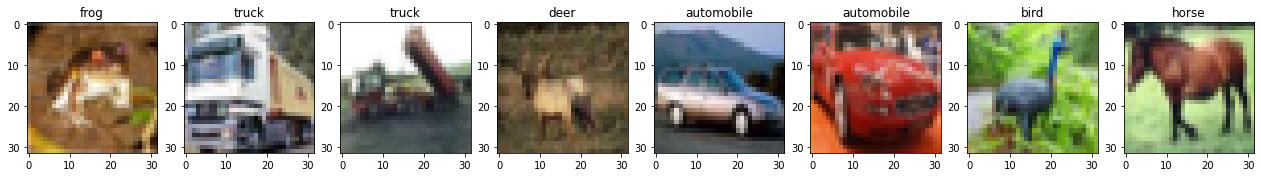

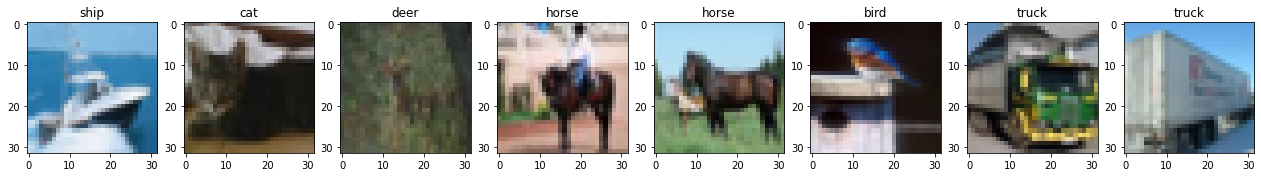

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def show_images(images, labels, ncols = 8):
    figure, axs = plt.subplots(figsize = (22, 6), nrows = 1, ncols = ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])

show_images(train_images[:8], train_labels[:8], ncols = 8)
show_images(train_images[8:16], train_labels[8:16], ncols = 8)

# Data Preprocessing(데이터 전처리)
- Image Pixel(0~255)사이의 값을 255로 나누어 값을 구한다.
- 데이터 타입을 float32로 변환합니다.

In [17]:
def get_preprocessing(images, labels):
    images = np.array(images/255.0, dtype = np.float32)
    labels = np.array(labels, dtype = np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessing(train_images, train_labels)
test_images, test_labels = get_preprocessing(test_images, test_labels)

In [18]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [19]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

# Custom Model 생성

In [37]:
Image_Size = 32
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
# model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dropout(rate=0.5))
# model.add(Dense(300, activation = 'relu'))
# model.add(Dropout(rate=0.3))
# model.add(Dense(10, activation = 'softmax'))

input_tensor = Input(shape = (Image_Size, Image_Size , 3))
x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(input_tensor)
x = Conv2D(filters= 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.5)(x)
x = Dense(300, activation = 'relu')(x)
x = Dropout(rate = 0.3)(x)
output = Dense(10, activation = 'softmax')(x)

model = Model(inputs = input_tensor, outputs = output)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0   

In [38]:
model.compile(optimizer=Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [39]:
with tf.device("/device:GPU:0"):
    history2 = model.fit(x = train_images, y = train_labels, batch_size = 64, epochs = 30, validation_split= 0.15, verbose=1)

Train on 42500 samples, validate on 7500 samples
Epoch 1/30
42500/42500 [==============================] - 6s 144us/sample - loss: 2.3037 - accuracy: 0.0982 - val_loss: 53.5821 - val_accuracy: 0.0987
Epoch 2/30
42500/42500 [==============================] - 5s 126us/sample - loss: 2.3028 - accuracy: 0.0971 - val_loss: 487.9871 - val_accuracy: 0.0984
Epoch 3/30
42500/42500 [==============================] - 5s 127us/sample - loss: 2.3030 - accuracy: 0.0991 - val_loss: 1460.9419 - val_accuracy: 0.0984
Epoch 4/30
42500/42500 [==============================] - 5s 126us/sample - loss: 2.3027 - accuracy: 0.0998 - val_loss: 1471.9157 - val_accuracy: 0.1008
Epoch 5/30
42500/42500 [==============================] - 5s 126us/sample - loss: 2.3029 - accuracy: 0.0958 - val_loss: 2301.6054 - val_accuracy: 0.0984
Epoch 6/30
42500/42500 [==============================] - 5s 127us/sample - loss: 2.3027 - accuracy: 0.0992 - val_loss: 1155.4662 - val_accuracy: 0.1011
Epoch 7/30
42500/42500 [============

10000/10000 [==============================] - 1s 104us/sample - loss: 500.6250 - accuracy: 0.0999


[500.6249893333435, 0.0999]

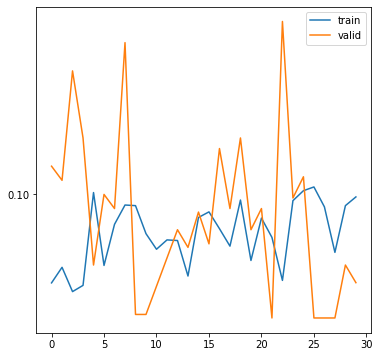

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history2)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

In [30]:
preds = model.predict(np.expand_dims(test_images[0], axis = 0))
print('예측 결과 shaep :', preds.shape)
print('예측 결과 :', preds)

예측 결과 shaep : (1, 10)
예측 결과 : [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [31]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (32, 10)
예측 결과: [[0.13511242 0.02550227 0.18344496 0.04230877 0.0768946  0.03027287
  0.07066961 0.21855232 0.1307718  0.0864704 ]
 [0.13459706 0.04881313 0.14889187 0.04735229 0.07536004 0.04501764
  0.09839518 0.20299377 0.09941462 0.0991644 ]
 [0.1394578  0.03916085 0.16097774 0.04355437 0.07223427 0.0391615
  0.09215767 0.2059078  0.11074667 0.09664127]
 [0.12632076 0.06433739 0.1330204  0.0596952  0.08301918 0.05911789
  0.10409295 0.16927198 0.09884192 0.10228238]
 [0.13693221 0.0448438  0.15321882 0.04348665 0.07234663 0.04109466
  0.09687267 0.21500635 0.09825606 0.09794212]
 [0.13901116 0.03701074 0.1631916  0.03969185 0.07022765 0.03537983
  0.08987464 0.22864252 0.10247692 0.09449314]
 [0.13969114 0.03775722 0.16177715 0.03856999 0.06872884 0.0351829
  0.09178316 0.23230693 0.09924941 0.09495319]
 [0.13947693 0.03676353 0.1633475  0.03886164 0.06933929 0.03484737
  0.09018546 0.23148037 0.1012872  0.09441074]
 [0.13984889 0.03525937 0.16543348 0.03804302 0.06880

In [32]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


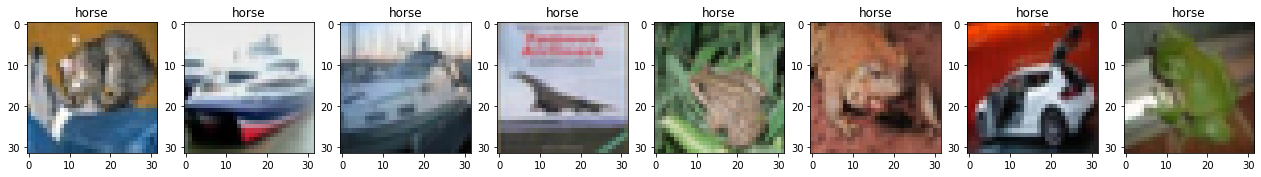

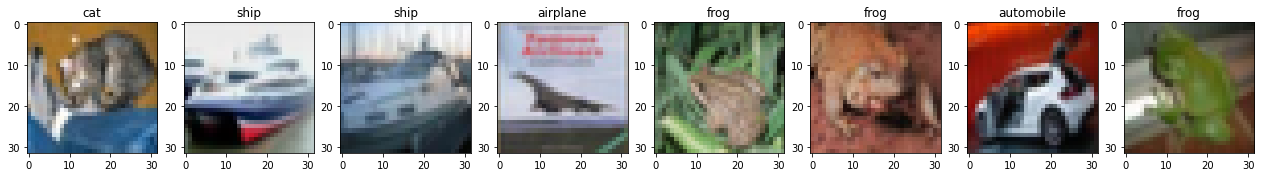

In [33]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)